In [15]:
import sys,os
sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath('../modules/'))

import healpy as h
import multiprocessing as mp
from modules.settings import global_mmf_settings as gset
from data_preprocess import tiling_the_sphere as tts
from data_preprocess import tile_planck_data as tpd
from filters import modular_multi_matched_filter as mmf
from simulate import cluster_templates as cltemp

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset="planck_pr3"
whichch="hfi"
mask_point_sources=False
numprocs=35

if whichch=="allch":
    chmin=30.
elif whichch=="hfi":
    chmin=100.

use_psf_data=True
ps_suffix="_inpainted_data"
if mask_point_sources:
    use_psf_data=False
    ps_suffix="_masked_data"
    
    
figstamp=dataset + "_" + whichch + ps_suffix
dir_suffix=whichch + ps_suffix

save_results=False
run_analysis=False

figstamp,dir_suffix

outpath="/results/" + dataset + "/planck_cat_" + dir_suffix + "/"
tempdatapath="/tempdata/" + dataset + "/planck_tiles/"
gset.setup_mmf_config(dataset=dataset,outpath=outpath,tempdatapath=tempdatapath,chmin=chmin,xsize=15.,do_band_pass=True,use_psf_data=use_psf_data)
figpath=gset.mmfset.paths["result_figs"]
datapath=gset.mmfset.paths["result_data"]

In [23]:
gset.mmfset.result_path

'/scratch/nas_chluba/specdist/arotti/mmf_dataout//results/planck_pr3/planck_cat_hfi_inpainted_data/15deg_patches/'

In [3]:
tile_map,fsky_map,apo_mask=tts.return_sky_tile_map()
tiledef=tpd.get_tangent_plane_fnames(fsky_map=fsky_map,fsky_thr=0.3)
# h.mollview(tile_map)
# filename=figpath + "tile_the_sky.pdf"
# plt.savefig(filename,bbox_inches="tight",dpi=200)

In [4]:
from automated_detection import extract_tile_cluster_catalogue_v1 as etcc

In [5]:
tmplt=cltemp.cluster_spectro_spatial_templates(T_step=1.,theta500_min=1.,theta500_max=100.,theta_step=2.)
tmplt.setup_templates()

In [6]:
px=212
print tiledef[px]["TILENAME"]

tile_G45.0+24.62


In [7]:
cat,fildata=etcc.extract_tile_cluster_catalogue(px,tiledef,tmplt,genfig=True)

<IPython.core.display.Javascript object>


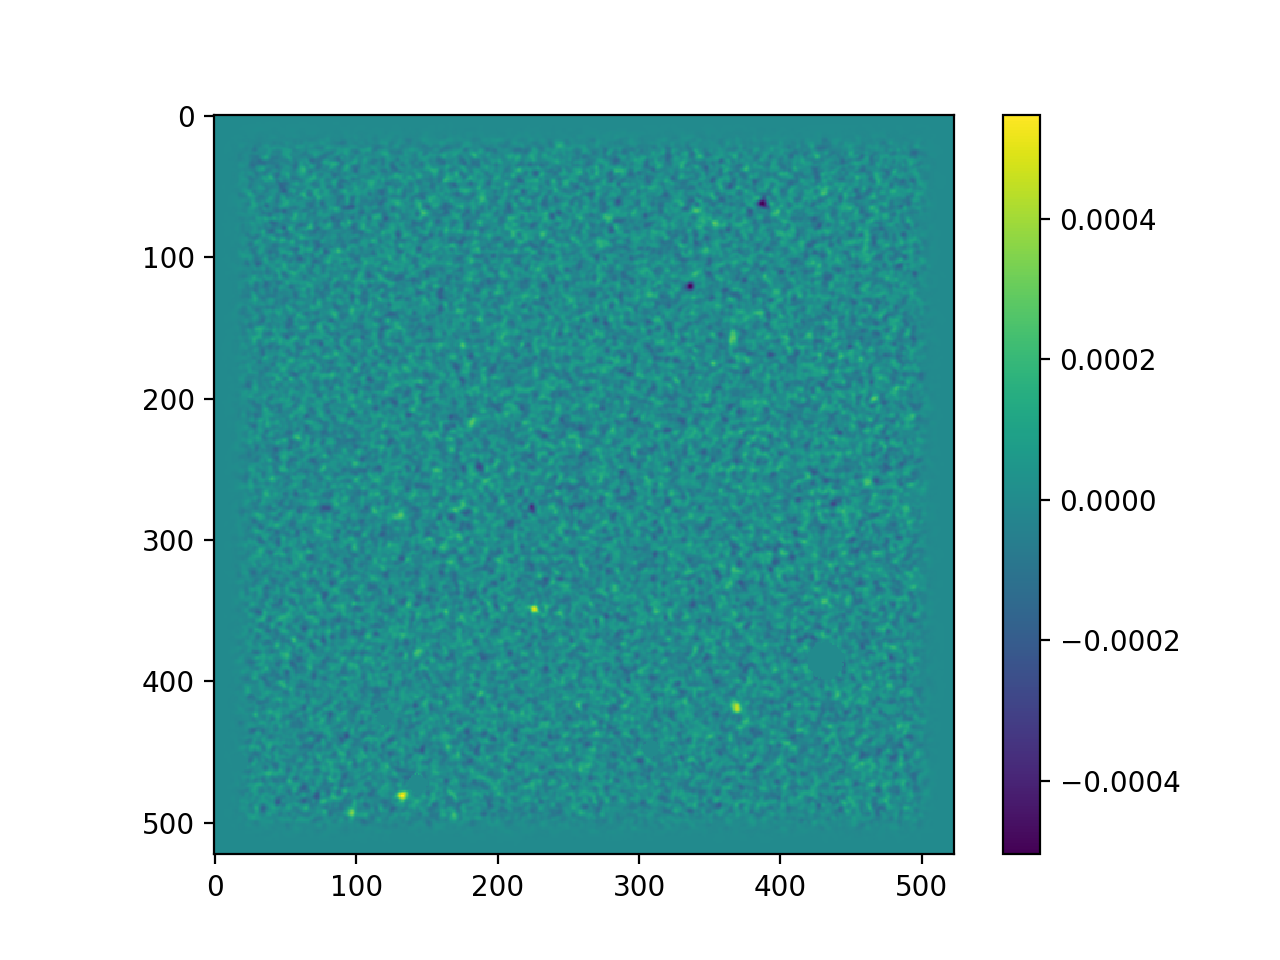

<IPython.core.display.Javascript object>


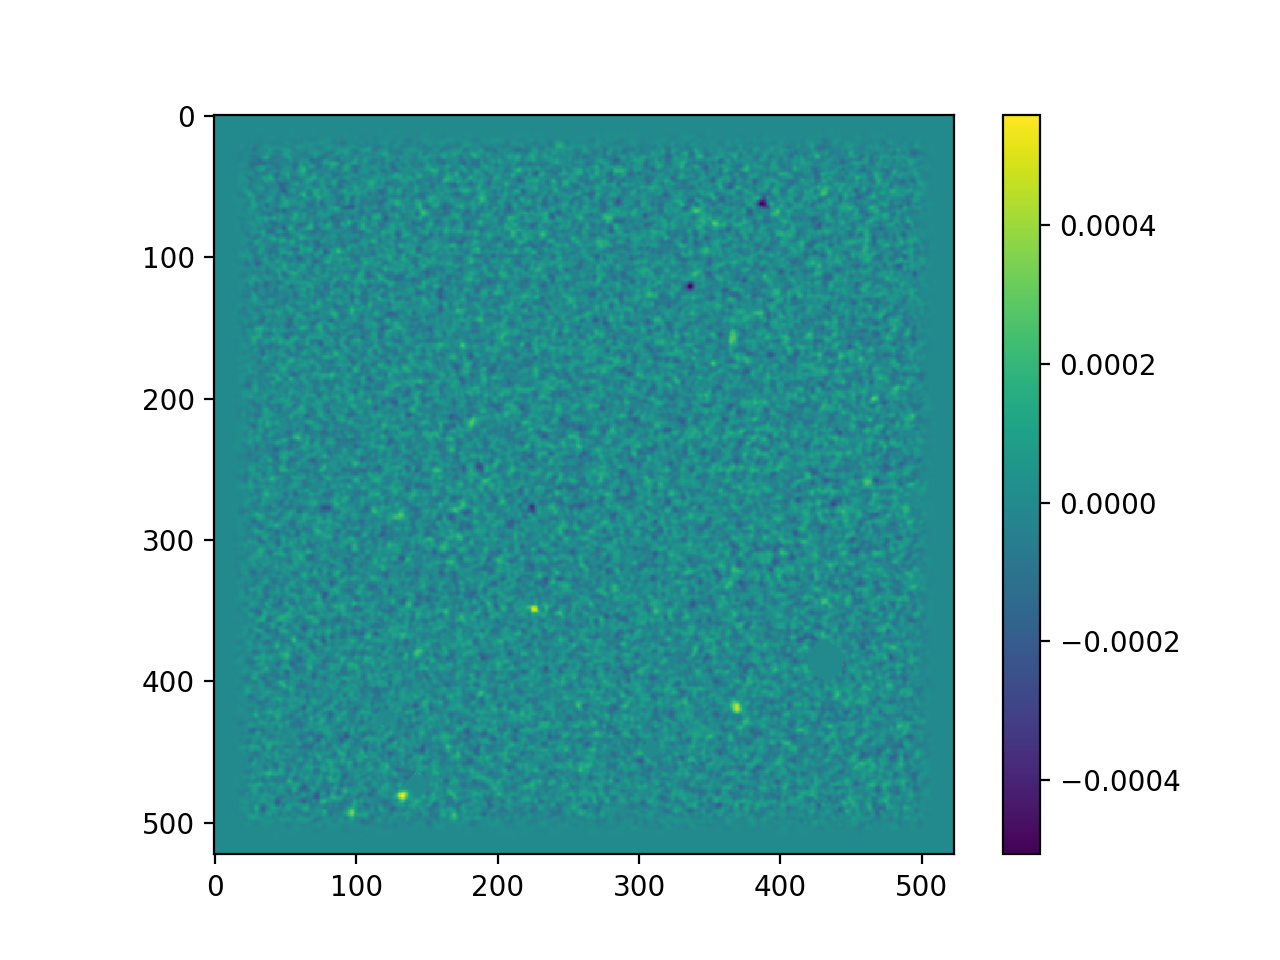

In [16]:
figure()
imshow(fildata["iter0"][1])
colorbar()

figure()
imshow(fildata["iter1"][1])
colorbar()

In [8]:
all_files=os.listdir(gset.mmfset.paths["result_data"])
inc_px=[]
tile_cluscat={}
for tname in all_files:
    fname=gset.mmfset.paths["result_data"] + tname
    temp_cat=etcc.read_dict(fname)
    px=temp_cat["pix"]
    if px in tiledef.keys():
        inc_px=inc_px + [px]
#     tile_cluscat[tiledef[px]["TILENAME"]]=temp_cat["cat"]

In [9]:
dummy=np.zeros(h.nside2npix(8))
dummy[inc_px]=1.

In [10]:
all_tiles=np.zeros(h.nside2npix(8))
all_tiles[tiledef.keys()]=1

In [11]:
x=all_tiles+dummy
h.mollview(x)

In [12]:
missing_px=np.where(x==1)[0]

In [22]:
list(missing_px)

[243, 244, 245, 301, 302, 303, 468, 469, 470, 515, 606, 607, 608]

In [19]:
x=tiledef.keys()
x?

In [36]:
from astropy.io import fits

In [53]:
f=fits.open(tiledef[608]["FILENAME"])

<IPython.core.display.Javascript object>


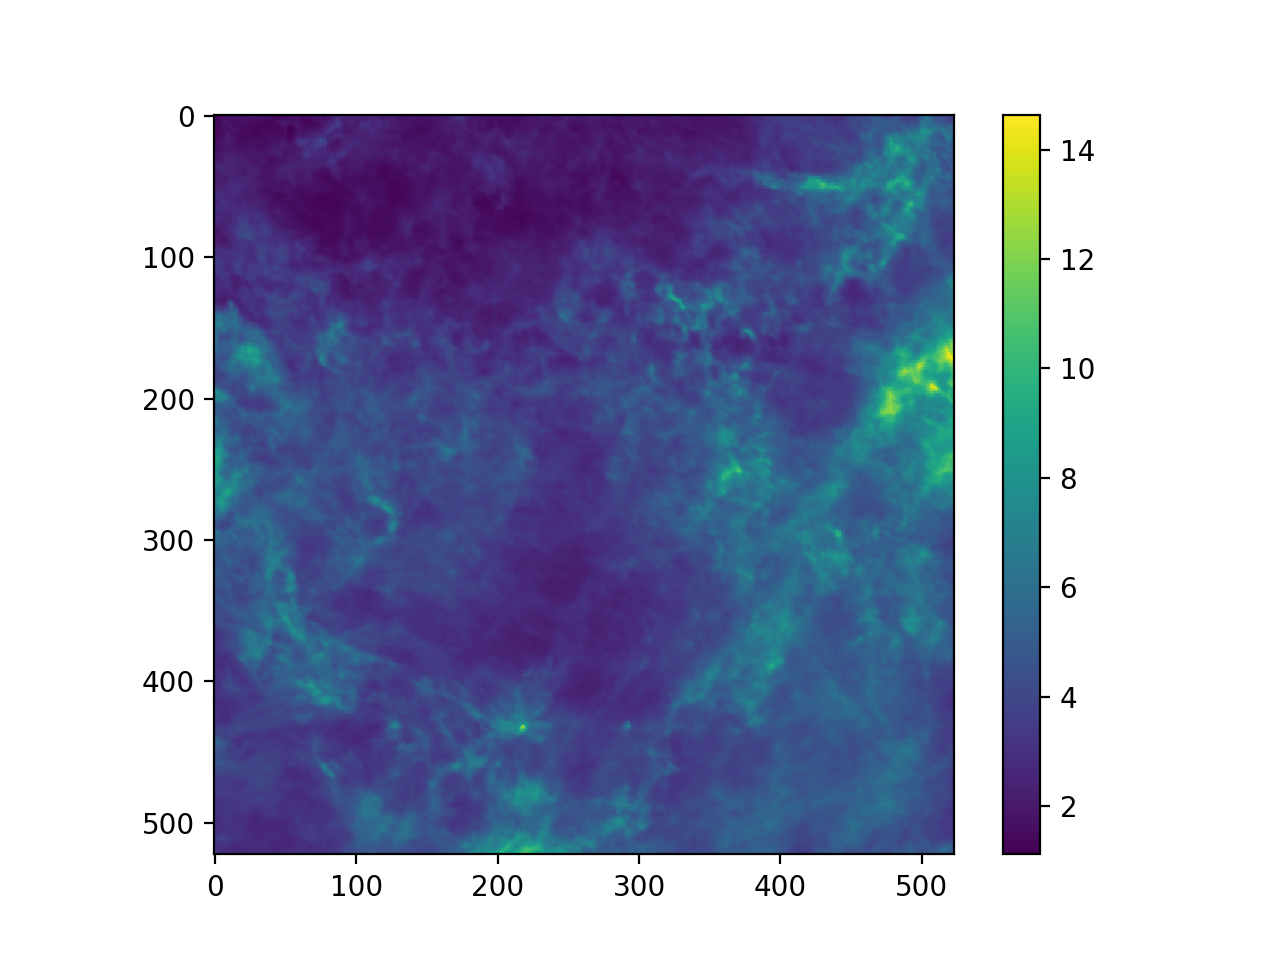

In [54]:
figure()
imshow(f[6].data[8,])
colorbar()